# Import necessary libraries
# Load the dataset

In [4]:
import pandas as pd
Twitter_DF=pd.read_csv(r"/content/twitter_training.csv", encoding='latin-1')
Twitter_DF.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
Twitter_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Remove irrelevant columns like ids, dates, flags, and users

In [6]:
# Remove the irrelevant columns using the drop() method
# Make sure the column names match the names in your DataFrame
Twitter_DF = Twitter_DF.drop(['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,'], axis=1)

# Print the first few rows of the cleaned dataframe
print(Twitter_DF.head(10))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Clean the text data by removing noise like special characters, punctuations, and URLs

In [7]:
import pandas as pd
import re

# Load the CSV file
Twitter_DF = pd.read_csv(r"/content/twitter_training.csv", encoding='latin-1')

# Assuming the text data is in the fourth column (index 3), keep this column and drop the others
Twitter_DF = Twitter_DF.iloc[:, [3]]  # Keep only the fourth column
Twitter_DF.columns = ['text'] # Rename the column to 'text'

# Define a function to clean the text data
def clean_text(text):
    # Handle non-string values
    if not isinstance(text, str):
        return ""  # Or any other appropriate handling for non-string values

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the 'text' column
Twitter_DF['text'] = Twitter_DF['text'].apply(clean_text)

# Print the first few rows of the cleaned dataframe
print(Twitter_DF.head())

                                                text
0  i am coming to the borders and i will kill you...
1  im getting on borderlands and i will kill you all
2  im coming on borderlands and i will murder you...
3  im getting on borderlands  and i will murder y...
4  im getting into borderlands and i can murder y...


# Convert the text to lowercase and remove stop words.

In [8]:
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re',
    'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he',
    'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s',
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'don\'t', 'should', 'should\'ve', 'now', 'd', 'll',
    'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t',
    'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t',
    'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn',
    'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t',
    'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

In [9]:
import nltk
nltk.download('punkt') # Download the 'punkt' resource

# Define a function to clean and preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stop words
    words = [word for word in words if not word in stopwords]
    # Join the remaining words back into a single string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the preprocess_text function to the 'text' column
Twitter_DF['text'] = Twitter_DF['text'].apply(preprocess_text)

# Print the first few rows of the cleaned dataframe
print(Twitter_DF.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                            text
0            coming borders kill
1    im getting borderlands kill
2   im coming borderlands murder
3  im getting borderlands murder
4  im getting borderlands murder


In [10]:
# Load the CSV file, specifying column names
Twitter_DF = pd.read_csv(r"/content/twitter_training.csv", encoding='latin-1', names=['target', 'ids', 'date', 'flag', 'user', 'text'])

# Keep only the 'target' and 'text' columns
Twitter_DF = Twitter_DF[['target', 'text']]

# ... (rest of your code for cleaning and preprocessing)

# Create the 'final_target' column
Twitter_DF['final_target'] = Twitter_DF['target'].apply(lambda x: 0 if x == 0 else 2 if x == 4 else 1)
print(Twitter_DF['final_target'].value_counts())

final_target
1    74676
2        6
Name: count, dtype: int64


In [11]:
Twitter_DF

,target,text,final_target
0,2401,NaN,1
1,2401,NaN,1
2,2401,NaN,1
3,2401,NaN,1
4,2401,NaN,1
...,...,...,...
74677,9200,NaN,1
74678,9200,NaN,1
74679,9200,NaN,1
74680,9200,NaN,1


# Target colum distribution overview

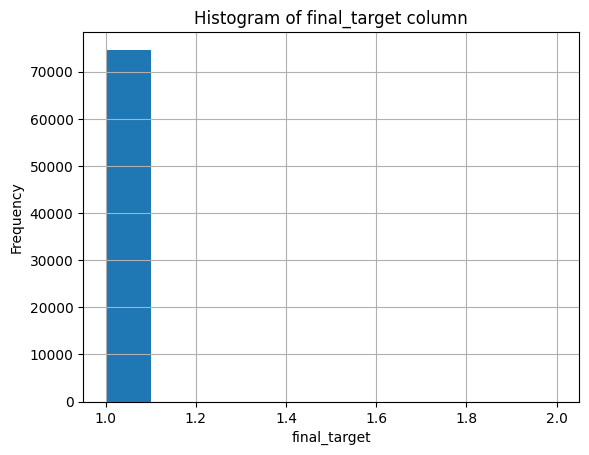

In [12]:
import matplotlib.pyplot as plt
# draw histogram for a column in the DataFrame

Twitter_DF['final_target'].hist()
plt.title('Histogram of final_target column')
plt.xlabel('final_target')
plt.ylabel('Frequency')
plt.show()

In [13]:
Twitter_DF

,target,text,final_target
0,2401,NaN,1
1,2401,NaN,1
2,2401,NaN,1
3,2401,NaN,1
4,2401,NaN,1
...,...,...,...
74677,9200,NaN,1
74678,9200,NaN,1
74679,9200,NaN,1
74680,9200,NaN,1


# MODEL TRAINING, TESTING, EVALUTION AND TRY NEW VALUES
MODEL TRAINING

In [27]:
from sklearn.model_selection import train_test_split
#Twitter_DF=pd.read_csv(r"C:\Users\91939\OneDrive\Desktop\Mentor_P8\DATASETS\TWITTER_SENTIMENT_ANALYSIS_PROCESSED.csv")
Independent_var = Twitter_DF['text']
Dependent_var = Twitter_DF['final_target']

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 67213
IV_test  : 7469
DV_train : 67213
DV_test  : 7469


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs",max_iter=200000)

from sklearn.pipeline import Pipeline

In [30]:
# Convert the 'text' column to string type before fitting the model
IV_train = IV_train.astype(str)
IV_test = IV_test.astype(str)

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[7468,    1],
       [   0,    0]])

# MODEL TEST AND EVALUTION

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9998661132681751
Precision :  1.0
Recall :  0.9998661132681751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
